In [2]:
!pip install evidently

In [1]:
import pandas as pd
df = pd.read_csv("dataset/DelayedFlights.csv")


In [2]:
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Drop missing values
df = df.dropna()

# Create binary target: 1 = delayed (> 15 mins)
df['Delayed'] = (df['DepDelay'] > 15).astype(int)

# Select features
features = ['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'ArrTime', 'Distance']
target = 'Delayed'

X = df[features]
y = df[target]

In [4]:
from sklearn.model_selection import train_test_split

X_ref, X_curr, y_ref, y_curr = train_test_split(X, y, test_size=0.5, random_state=42)


In [5]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_ref, y_ref)

# Predict on current dataset
y_pred = model.predict(X_curr)


Delayed
1    0.87647
0    0.12353
Name: proportion, dtype: float64
              Month    DayofMonth     DayOfWeek       DepTime       ArrTime  \
count  1.247486e+06  1.247486e+06  1.247486e+06  1.247486e+06  1.247486e+06   
mean   6.065399e+00  1.572542e+01  3.980082e+00  1.558832e+03  1.616749e+03   
std    3.508937e+00  8.793008e+00  1.993270e+00  4.543300e+02  5.839416e+02   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    3.000000e+00  8.000000e+00  2.000000e+00  1.232000e+03  1.326000e+03   
50%    6.000000e+00  1.600000e+01  4.000000e+00  1.618000e+03  1.737000e+03   
75%    9.000000e+00  2.300000e+01  6.000000e+00  1.924000e+03  2.048000e+03   
max    1.200000e+01  3.100000e+01  7.000000e+00  2.400000e+03  2.400000e+03   

           Distance  
count  1.247486e+06  
mean   7.415867e+02  
std    5.593643e+02  
min    1.100000e+01  
25%    3.340000e+02  
50%    5.950000e+02  
75%    9.720000e+02  
max    4.962000e+03  


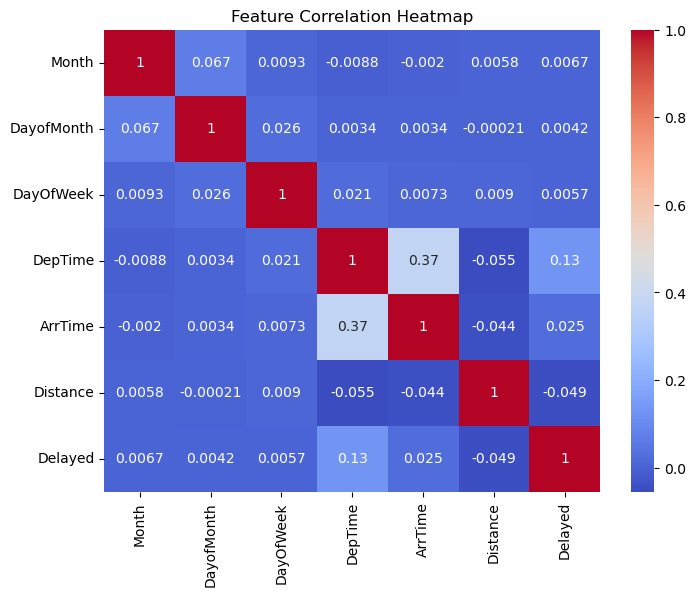

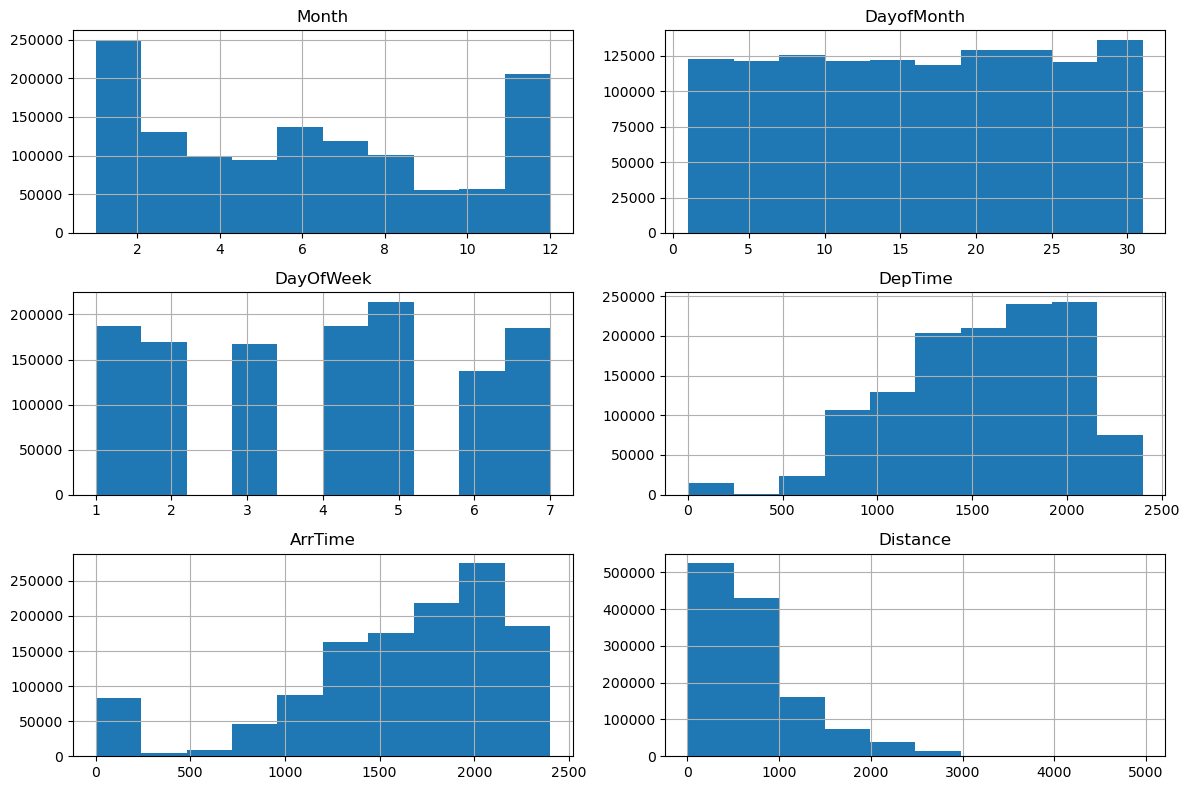

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Target distribution
print(y.value_counts(normalize=True))

# Feature statistics
print(X.describe())

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[features + [target]].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Histograms
X.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()


In [5]:
from evidently.report import Report
from evidently.metric_preset import ClassificationPreset

report = Report(metrics=[
    ClassificationPreset()
])

# Reference is X_ref + true y
# Current is X_curr + predicted y_pred
report.run(
    reference_data=pd.concat([X_ref, y_ref], axis=1),
    current_data=pd.concat([X_curr, pd.Series(y_pred, name='Delayed')], axis=1),
    column_mapping=None
)

# Save the report
report.save_html('reports/model_quality_report.html')
print('Report saved: reports/model_quality_report.html')


ImportError: cannot import name 'BaseResult' from 'evidently.core' (/home/lab/projectsw/anaconda/anaconda3/envs/bp/lib/python3.12/site-packages/evidently/core/__init__.py)

In [2]:
from evidently.report import Report
from evidently.metric_preset import ClassificationPreset

print("Evidently AI is working!")


ModuleNotFoundError: No module named 'evidently'

In [1]:
!pip install evidently

In [5]:
!pip install --force-reinstall --no-deps evidently==0.7.3

  Using cached evidently-0.7.3-py3-none-any.whl.metadata (10 kB)
Using cached evidently-0.7.3-py3-none-any.whl (4.6 MB)
  Attempting uninstall: evidently
    Found existing installation: evidently None
error: uninstall-no-record-file

× Cannot uninstall evidently None
╰─> The package's contents are unknown: no RECORD file was found for evidently.

hint: You might be able to recover from this via: pip install --force-reinstall --no-deps evidently==0.7.3
